In [120]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

In [121]:
# Loading the Iris dataset
iris = pd.read_csv('/content/drive/MyDrive/Encryptix/Iris flower/IRIS.csv')

In [122]:
print(iris.shape)

(150, 5)


In [123]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [124]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [125]:
print(iris.describe(include='all'))

        sepal_length  sepal_width  petal_length  petal_width      species
count     150.000000   150.000000    150.000000   150.000000          150
unique           NaN          NaN           NaN          NaN            3
top              NaN          NaN           NaN          NaN  Iris-setosa
freq             NaN          NaN           NaN          NaN           50
mean        5.843333     3.054000      3.758667     1.198667          NaN
std         0.828066     0.433594      1.764420     0.763161          NaN
min         4.300000     2.000000      1.000000     0.100000          NaN
25%         5.100000     2.800000      1.600000     0.300000          NaN
50%         5.800000     3.000000      4.350000     1.300000          NaN
75%         6.400000     3.300000      5.100000     1.800000          NaN
max         7.900000     4.400000      6.900000     2.500000          NaN


In [126]:
# Handling missing values
iris = iris.replace('NaN', np.nan)
iris = iris.dropna()

In [127]:
iris_outcome = pd.crosstab(index=iris["species"], columns="count")
iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [128]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [129]:
# Function to remove outliers using IQR method
def remove_outliers(iris, column):
    Q1 = iris[column].quantile(0.25)
    Q3 = iris[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return iris[(iris[column] >= lower_bound) & (iris[column] <= upper_bound)]

# Removing outliers for each column
iris_main = iris.copy()
for column in iris.columns[:-1]:  # Excluding the 'species' column
    iris_main = remove_outliers(iris_main, column)

# Analyzing the cleaned data
print(iris_main.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    146.000000   146.000000    146.000000   146.000000
mean       5.856849     3.036986      3.807534     1.219863
std        0.834093     0.395145      1.757117     0.760365
min        4.300000     2.200000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.000000      6.900000     2.500000


In [130]:
iris_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  146 non-null    float64
 1   sepal_width   146 non-null    float64
 2   petal_length  146 non-null    float64
 3   petal_width   146 non-null    float64
 4   species       146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


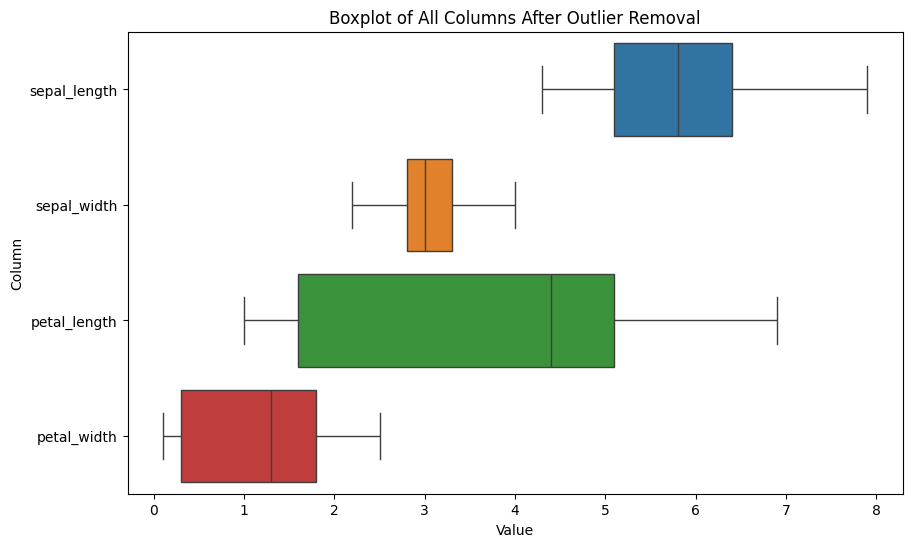

In [131]:
# Boxplot of all columns together
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_main, orient="h")
plt.xlabel("Value")
plt.ylabel("Column")
plt.title("Boxplot of All Columns After Outlier Removal")
plt.show()


In [132]:
# Identify outliers using the IQR method
def detect_outliers(iris, features):
    outliers_indices = []

    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR
        outliers_list_col = iris[(iris[col] < Q1 - outlier_step) | (iris[col] > Q3 + outlier_step)].index
        outliers_indices.extend(outliers_list_col)

    outliers_indices = list(set(outliers_indices))
    return outliers_indices

In [133]:
iris_main.shape

(146, 5)

In [134]:
# Checking NaN and All unique values so that if there is inconsistency in the data we will figure it out
unique_summary = iris_main.apply(lambda col: col.unique())
print(unique_summary)

sepal_length    [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.4, 4.8, 4.3, ...
sepal_width     [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, ...
petal_length    [1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, ...
petal_width     [0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, ...
species            [Iris-setosa, Iris-versicolor, Iris-virginica]
dtype: object


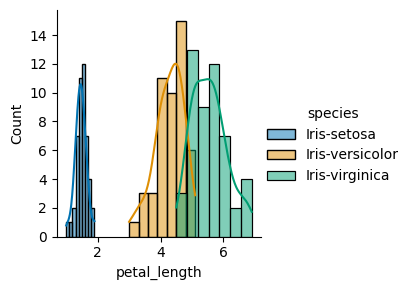

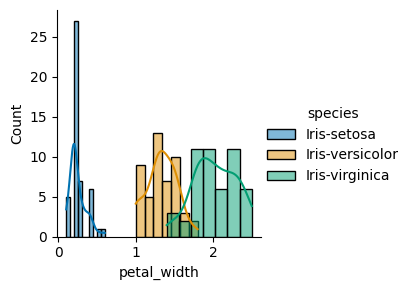

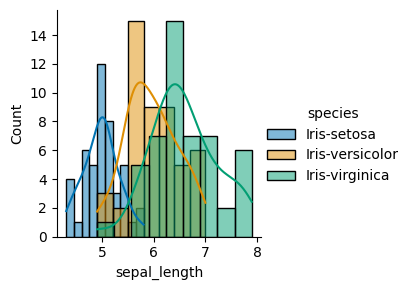

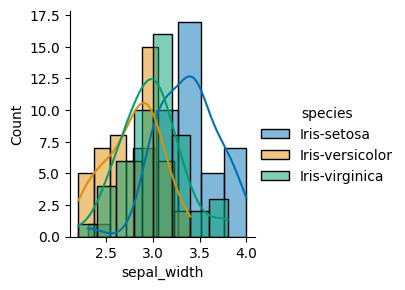

In [135]:
# Defining a custom color palette
custom_palette = sns.color_palette("colorblind", 3)

sns.FacetGrid(iris_main, hue="species", height=3, palette=custom_palette).map(sns.histplot, "petal_length", kde=True).add_legend()
sns.FacetGrid(iris_main, hue="species", height=3, palette=custom_palette).map(sns.histplot, "petal_width", kde=True).add_legend()
sns.FacetGrid(iris_main, hue="species", height=3, palette=custom_palette).map(sns.histplot, "sepal_length", kde=True).add_legend()
sns.FacetGrid(iris_main, hue="species", height=3 , palette=custom_palette).map(sns.histplot, "sepal_width", kde=True).add_legend()
plt.show()

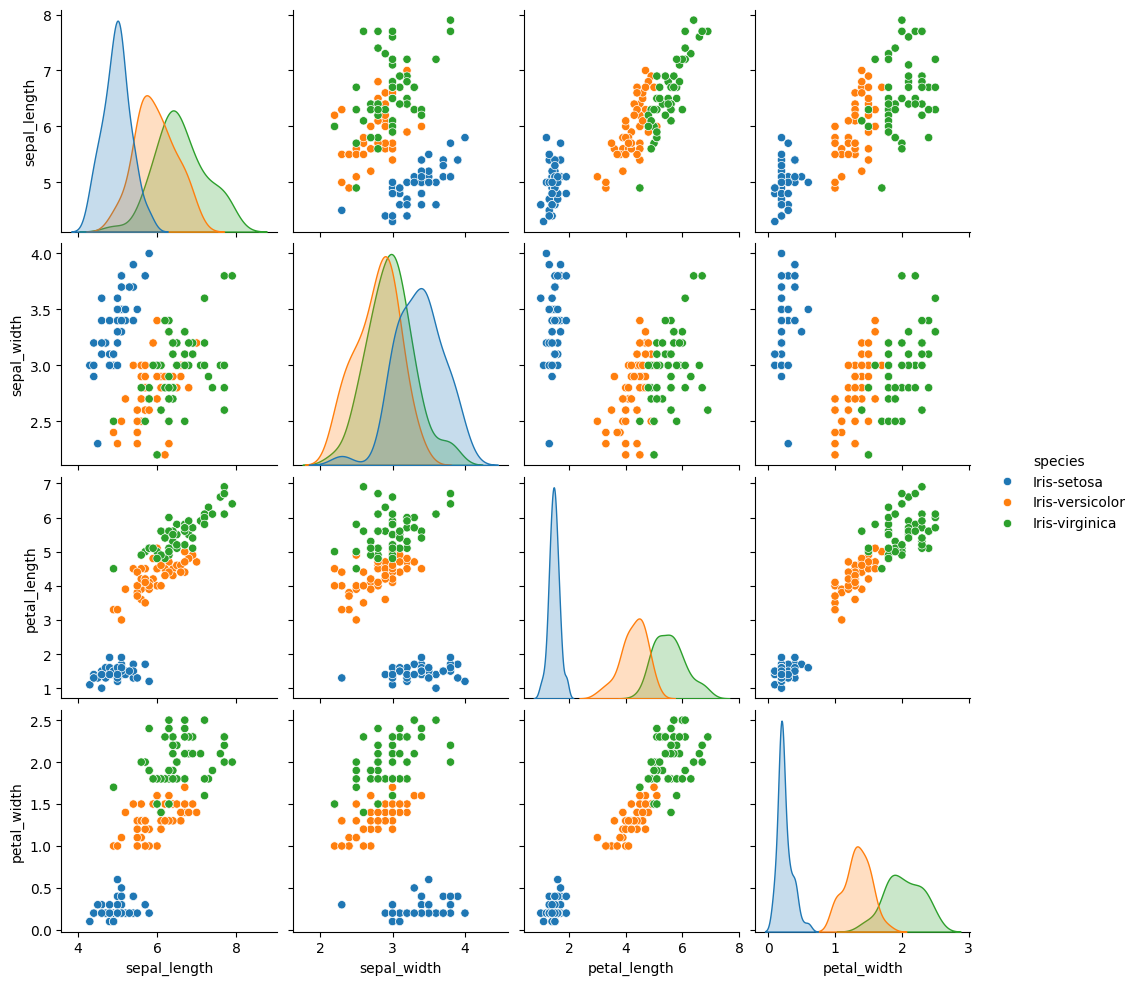

In [136]:
# Visualizing the data without outliers
sns.pairplot(iris_main, hue='species')
plt.show()

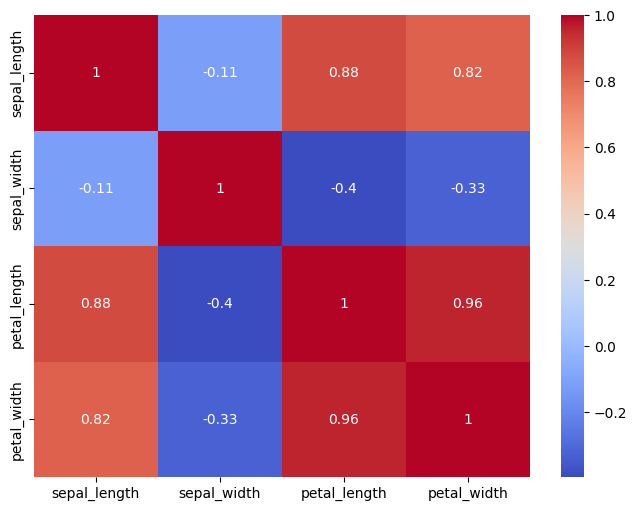

In [137]:
# Heatmap of the correlation matrix for numerical columns only
plt.figure(figsize=(8, 6))
sns.heatmap(iris_main.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

In [138]:
X = iris_main.drop('species', axis=1)
y = iris_main['species']

In [139]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

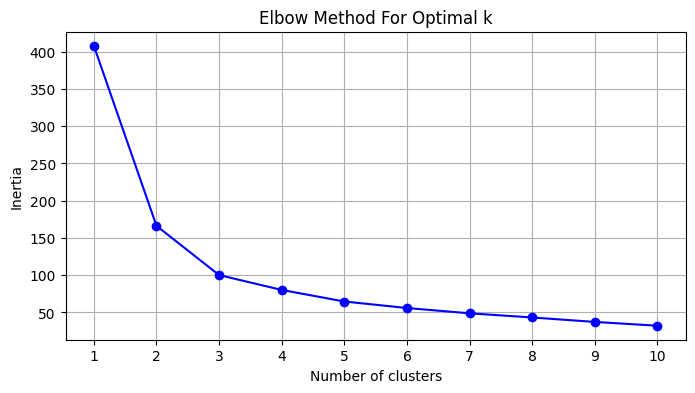

In [141]:
# Elbow Method for determining the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

From the above graph we can cleary see that that the K-value creating an elbow shape is 3. So the number of clusters created will be 3.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


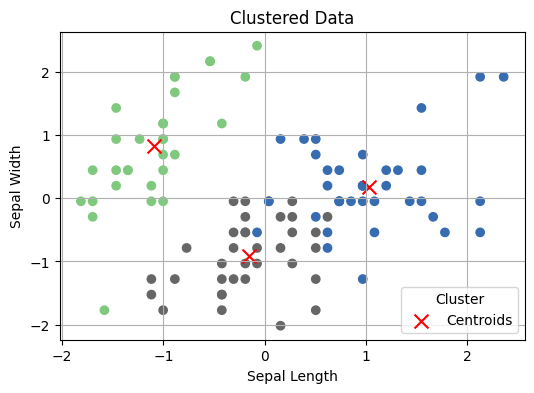

In [142]:
optimal_clusters = 3

# Visualizing the clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

centers = kmeans.cluster_centers_

# Plotting the clusters
plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans.labels_, cmap='Accent')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', s=100, label='Centroids')
plt.title('Clustered Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Adding legend
plt.legend(title='Cluster')
plt.grid(True)

plt.show()

In [143]:
# Training a K-Means Clustering model with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_train)
kmeans_predictions = kmeans.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Classification Model**

In [144]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")
print(classification_report(y_test, log_reg_pred))

Logistic Regression Accuracy: 0.9773
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        44
      macro avg       0.98      0.97      0.97        44
   weighted avg       0.98      0.98      0.98        44



In [145]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.9545
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.95        44
      macro avg       0.95      0.95      0.95        44
   weighted avg       0.95      0.95      0.95        44



In [146]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.9545
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.95        44
      macro avg       0.95      0.95      0.95        44
   weighted avg       0.95      0.95      0.95        44



In [147]:
# Evaluating the models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_scores = [accuracy_score(y_test, logreg_predictions),
                   accuracy_score(y_test, dtree_predictions),
                   accuracy_score(y_test, rf_predictions)]

print(accuracy_scores)

[0.9772727272727273, 0.9545454545454546, 0.9545454545454546]


In [148]:
# Select the best model
best_model = None
best_acc = 0

if log_reg_acc > best_acc:
    best_acc = log_reg_acc
    best_model = log_reg

if rf_acc > best_acc:
    best_acc = rf_acc
    best_model = rf

if dt_acc > best_acc:
    best_acc = dt_acc
    best_model = dt

print(f"Best Model: {best_model.__class__.__name__} with accuracy {best_acc:.4f}")

Best Model: LogisticRegression with accuracy 0.9773


In [149]:
# Predicitng the iris flower based on some samples using the the best mode

# Create a sample dataset
sample_data = [[4.6, 3.4, 1.4, 0.2],
               [6.3, 3.3, 6.0, 2.5],
               [5.0, 3.0, 1.6, 0.2]]

predicted_species = best_model.predict(sample_data)

# Print the predicted species
for i, prediction in enumerate(predicted_species):
    print(f"Sample {i+1}: Predicted species is {prediction}")

Sample 1: Predicted species is Iris-versicolor
Sample 2: Predicted species is Iris-virginica
Sample 3: Predicted species is Iris-versicolor
